# Neural Networks

A neural network is a very general method of (non-linear) regression. For predictors which are numeric (or can be coded as numbers) and a response variable that is numeric (or can be coded as a number), a neural network provides a very general way of predicting the response variable from the predictors.

This is *supervised learning* where the neural network is trained or fitted to a training set of data, and after training, the same neural network can be used to make predictions based on other inputs.

A neural network is made up of _layers_ where each layer takes the values from the previous layer, multiplies by a _weight matrix_ and adds a _bias vector_, then applies an activation function. *MATH WARNING*

$$\mathbf{x}_1 = \sigma(W_0\mathbf{x}_0 + \mathbf{b}_0)$$

for an activation function $\sigma$ and a weight matrix $W_0$ and bias vector $\bf{b}_0$.

The power of neural networks comes from being able to choose the elements of the weight matrices and the bias vectors using the training data to optimize the predictions.

Let's do a simple example where we have just two predictor variables and a single numeric response variable.

Keras is a Python library for doing neural network operations. It provides a convenient API around Google's TensorFlow library (which is not very user friendly by itself). Be sure to `pip install keras tensorflow` to install the libraries.

In [30]:
from keras.layers import Dense
from keras.models import Sequential

Let's make some test data. The two inputs will be randomly selected numbers betweeen 0 and 1.

<IPython.core.display.Javascript object>


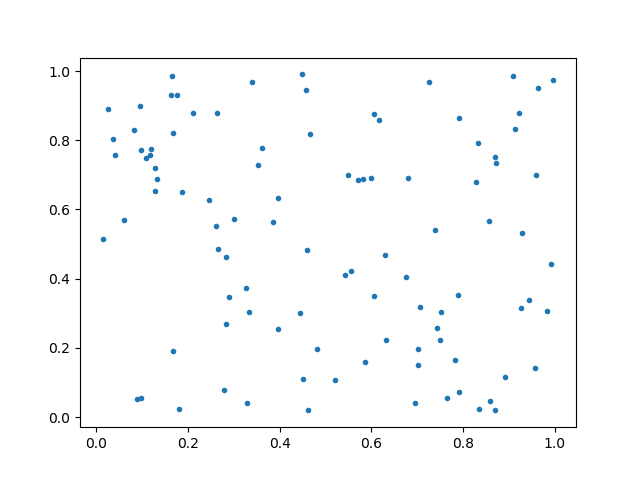

In [31]:
import numpy as np
# number of training data points
N = 100
x = np.random.uniform(size=[N, 2])

%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sns
plt.plot(x[:,0], x[:,1], '.')

Let's make a hairy function that we are trying to approximate

In [32]:
def hairy(x):
    return np.tanh(np.matmul(x, [[10], [-4]]))

Now let's add some noise to our training data

In [33]:
# noise standard deviation
SIGMA = 0.1
true_response = hairy(x)
y = true_response + np.random.normal(scale=SIGMA, size=true_response.shape)

<IPython.core.display.Javascript object>


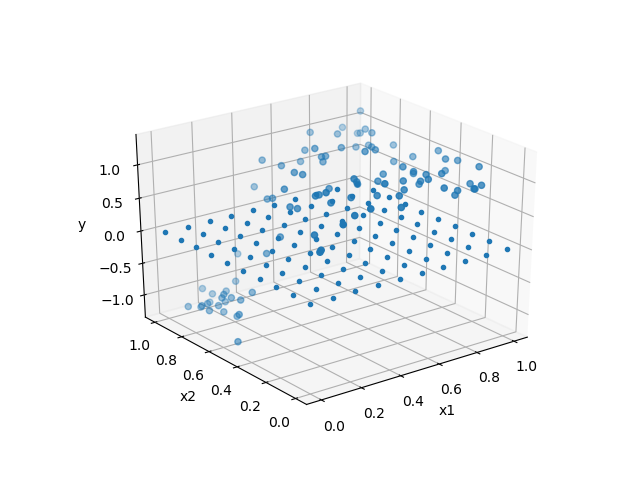

In [34]:
import mpl_toolkits.mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)
plt.xlabel('x1'); plt.ylabel('x2'); _ = ax.set_zlabel('y')

Now, let's make a simple one-layer neural network with a sigmoid activation function

In [35]:
model = Sequential([Dense(10, input_dim=2, activation='tanh'), 
                    Dense(1, activation='tanh')])
model.compile(optimizer='adagrad', loss='mean_squared_error')

In [44]:
# fit on our training data
model.fit(x, y, epochs=1000)

Epoch 1/1000
100/100 [==============================] - 0s 53us/step - loss: 0.1735
Epoch 2/1000
100/100 [==============================] - 0s 54us/step - loss: 0.1728
Epoch 3/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1716
Epoch 4/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1706
Epoch 5/1000
100/100 [==============================] - 0s 44us/step - loss: 0.1697
Epoch 6/1000
100/100 [==============================] - 0s 58us/step - loss: 0.1686
Epoch 7/1000
100/100 [==============================] - 0s 51us/step - loss: 0.1676
Epoch 8/1000
100/100 [==============================] - 0s 48us/step - loss: 0.1666
Epoch 9/1000
100/100 [==============================] - 0s 56us/step - loss: 0.1657
Epoch 10/1000
100/100 [==============================] - 0s 55us/step - loss: 0.1645
Epoch 11/1000
100/100 [==============================] - 0s 56us/step - loss: 0.1636
Epoch 12/1000
100/100 [==============================] - 0s 51us/step - lo

100/100 [==============================] - 0s 53us/step - loss: 0.1094
Epoch 98/1000
100/100 [==============================] - 0s 65us/step - loss: 0.1090
Epoch 99/1000
100/100 [==============================] - 0s 50us/step - loss: 0.1084
Epoch 100/1000
100/100 [==============================] - 0s 57us/step - loss: 0.1080
Epoch 101/1000
100/100 [==============================] - 0s 45us/step - loss: 0.1076
Epoch 102/1000
100/100 [==============================] - 0s 45us/step - loss: 0.1072
Epoch 103/1000
100/100 [==============================] - 0s 43us/step - loss: 0.1068
Epoch 104/1000
100/100 [==============================] - 0s 52us/step - loss: 0.1065
Epoch 105/1000
100/100 [==============================] - 0s 62us/step - loss: 0.1061
Epoch 106/1000
100/100 [==============================] - 0s 57us/step - loss: 0.1057
Epoch 107/1000
100/100 [==============================] - 0s 51us/step - loss: 0.1053
Epoch 108/1000
100/100 [==============================] - 0s 59us/step 

100/100 [==============================] - 0s 63us/step - loss: 0.0801
Epoch 193/1000
100/100 [==============================] - 0s 55us/step - loss: 0.0797
Epoch 194/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0795
Epoch 195/1000
100/100 [==============================] - 0s 54us/step - loss: 0.0793
Epoch 196/1000
100/100 [==============================] - 0s 60us/step - loss: 0.0791
Epoch 197/1000
100/100 [==============================] - 0s 63us/step - loss: 0.0788
Epoch 198/1000
100/100 [==============================] - 0s 68us/step - loss: 0.0787
Epoch 199/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0784
Epoch 200/1000
100/100 [==============================] - 0s 53us/step - loss: 0.0783
Epoch 201/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0780
Epoch 202/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0778
Epoch 203/1000
100/100 [==============================] - 0s 57us/ste

/Users/neil/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112547). Check your callbacks.
  % delta_t_median)


Epoch 254/1000
100/100 [==============================] - 0s 71us/step - loss: 0.0685
Epoch 255/1000
100/100 [==============================] - 0s 45us/step - loss: 0.0682
Epoch 256/1000
100/100 [==============================] - 0s 55us/step - loss: 0.0681
Epoch 257/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0679
Epoch 258/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0678
Epoch 259/1000
100/100 [==============================] - 0s 67us/step - loss: 0.0676
Epoch 260/1000
100/100 [==============================] - 0s 66us/step - loss: 0.0675
Epoch 261/1000
100/100 [==============================] - 0s 68us/step - loss: 0.0673
Epoch 262/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0672
Epoch 263/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0671
Epoch 264/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0668
Epoch 265/1000
100/100 [==============================

100/100 [==============================] - 0s 49us/step - loss: 0.0560
Epoch 350/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0559
Epoch 351/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0559
Epoch 352/1000
100/100 [==============================] - 0s 61us/step - loss: 0.0558
Epoch 353/1000
100/100 [==============================] - 0s 55us/step - loss: 0.0557
Epoch 354/1000
100/100 [==============================] - 0s 53us/step - loss: 0.0555
Epoch 355/1000
100/100 [==============================] - 0s 62us/step - loss: 0.0554
Epoch 356/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0553
Epoch 357/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0552
Epoch 358/1000
100/100 [==============================] - 0s 53us/step - loss: 0.0551
Epoch 359/1000
100/100 [==============================] - 0s 49us/step - loss: 0.0550
Epoch 360/1000
100/100 [==============================] - 0s 42us/ste

/Users/neil/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106111). Check your callbacks.
  % delta_t_median)


Epoch 380/1000
100/100 [==============================] - 0s 58us/step - loss: 0.0530
Epoch 381/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0529
Epoch 382/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0528
Epoch 383/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0528
Epoch 384/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0527
Epoch 385/1000
100/100 [==============================] - 0s 52us/step - loss: 0.0526
Epoch 386/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0525
Epoch 387/1000
100/100 [==============================] - 0s 60us/step - loss: 0.0524
Epoch 388/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0524
Epoch 389/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0523
Epoch 390/1000
100/100 [==============================] - 0s 55us/step - loss: 0.0522
Epoch 391/1000
100/100 [==============================

/Users/neil/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130111). Check your callbacks.
  % delta_t_median)


100/100 [==============================] - 0s 64us/step - loss: 0.0483
Epoch 439/1000
100/100 [==============================] - 0s 60us/step - loss: 0.0482
Epoch 440/1000
100/100 [==============================] - 0s 57us/step - loss: 0.0481
Epoch 441/1000
100/100 [==============================] - 0s 55us/step - loss: 0.0480
Epoch 442/1000
100/100 [==============================] - 0s 40us/step - loss: 0.0480
Epoch 443/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0479
Epoch 444/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0479
Epoch 445/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0477
Epoch 446/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0477
Epoch 447/1000
100/100 [==============================] - 0s 60us/step - loss: 0.0476
Epoch 448/1000
100/100 [==============================] - 0s 73us/step - loss: 0.0476
Epoch 449/1000
100/100 [==============================] - 0s 55us/ste

100/100 [==============================] - 0s 51us/step - loss: 0.0421
Epoch 534/1000
100/100 [==============================] - 0s 44us/step - loss: 0.0421
Epoch 535/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0420
Epoch 536/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0419
Epoch 537/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0419
Epoch 538/1000
100/100 [==============================] - 0s 47us/step - loss: 0.0418
Epoch 539/1000
100/100 [==============================] - 0s 53us/step - loss: 0.0418
Epoch 540/1000
100/100 [==============================] - 0s 44us/step - loss: 0.0417
Epoch 541/1000
100/100 [==============================] - 0s 61us/step - loss: 0.0416
Epoch 542/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0416
Epoch 543/1000
100/100 [==============================] - 0s 61us/step - loss: 0.0416
Epoch 544/1000
100/100 [==============================] - 0s 65us/ste

/Users/neil/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130052). Check your callbacks.
  % delta_t_median)


100/100 [==============================] - 0s 44us/step - loss: 0.0377
Epoch 629/1000
100/100 [==============================] - 0s 59us/step - loss: 0.0376
Epoch 630/1000
100/100 [==============================] - 0s 54us/step - loss: 0.0375
Epoch 631/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0375
Epoch 632/1000
100/100 [==============================] - 0s 65us/step - loss: 0.0375
Epoch 633/1000
100/100 [==============================] - 0s 44us/step - loss: 0.0374
Epoch 634/1000
100/100 [==============================] - 0s 44us/step - loss: 0.0374
Epoch 635/1000
100/100 [==============================] - 0s 55us/step - loss: 0.0373
Epoch 636/1000
100/100 [==============================] - 0s 49us/step - loss: 0.0373
Epoch 637/1000
100/100 [==============================] - 0s 52us/step - loss: 0.0373
Epoch 638/1000
100/100 [==============================] - 0s 61us/step - loss: 0.0372
Epoch 639/1000
100/100 [==============================] - 0s 42us/ste

100/100 [==============================] - 0s 53us/step - loss: 0.0341
Epoch 724/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0341
Epoch 725/1000
100/100 [==============================] - 0s 58us/step - loss: 0.0341
Epoch 726/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0341
Epoch 727/1000
100/100 [==============================] - 0s 62us/step - loss: 0.0340
Epoch 728/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0340
Epoch 729/1000
100/100 [==============================] - 0s 45us/step - loss: 0.0340
Epoch 730/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0339
Epoch 731/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0339
Epoch 732/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0339
Epoch 733/1000
100/100 [==============================] - 0s 49us/step - loss: 0.0339
Epoch 734/1000
100/100 [==============================] - 0s 45us/ste

100/100 [==============================] - 0s 64us/step - loss: 0.0314
Epoch 819/1000
100/100 [==============================] - 0s 59us/step - loss: 0.0314
Epoch 820/1000
100/100 [==============================] - 0s 58us/step - loss: 0.0313
Epoch 821/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0313
Epoch 822/1000
100/100 [==============================] - 0s 71us/step - loss: 0.0313
Epoch 823/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0313
Epoch 824/1000
100/100 [==============================] - 0s 53us/step - loss: 0.0312
Epoch 825/1000
100/100 [==============================] - 0s 45us/step - loss: 0.0312
Epoch 826/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0311
Epoch 827/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0311
Epoch 828/1000
100/100 [==============================] - 0s 52us/step - loss: 0.0311
Epoch 829/1000
100/100 [==============================] - 0s 52us/ste

100/100 [==============================] - 0s 46us/step - loss: 0.0291
Epoch 914/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0291
Epoch 915/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0291
Epoch 916/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0290
Epoch 917/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0290
Epoch 918/1000
100/100 [==============================] - 0s 53us/step - loss: 0.0290
Epoch 919/1000
100/100 [==============================] - 0s 46us/step - loss: 0.0290
Epoch 920/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0290
Epoch 921/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0289
Epoch 922/1000
100/100 [==============================] - 0s 54us/step - loss: 0.0289
Epoch 923/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0289
Epoch 924/1000
100/100 [==============================] - 0s 44us/ste

In [45]:
gridx = np.array(np.meshgrid(np.linspace(0,1,10, endpoint=True), np.linspace(0,1,10,endpoint=True))).T.reshape([-1, 2])
plt.plot(gridx[:,0], gridx[:,1], '.')

We can now use our fited model to make a prediction on a grid of input points

In [46]:
predictions = model.predict(gridx)

<IPython.core.display.Javascript object>


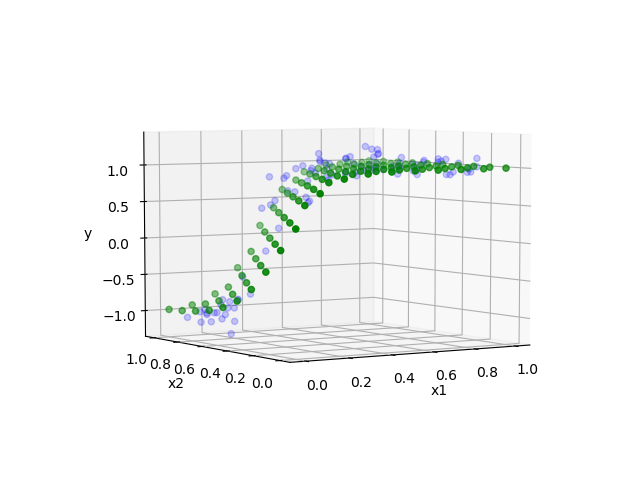

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gridx[:,0], gridx[:,1], predictions, color='green')
ax.scatter(x[:,0], x[:,1], y, color='blue', alpha=0.2)
plt.xlabel('x1'); plt.ylabel('x2'); _ = ax.set_zlabel('y')